# Assignment 6 - Function Optimization

In [1]:
# Set up the imports
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.animation import FuncAnimation
import math
from numpy import cos, sin, pi, exp 

## Single Variable Gradient Descent

In [2]:
# Step function for use in animation
def graddescstep(f, derivf, xstart, lr):
    bestx = xstart
    xtemp = bestx - derivf(bestx) * lr 
    bestx = xtemp
    y = f(bestx)
    return bestx

This is a one-dimensional implementation of the gradient descent method used to find the minima of a function. Given a function and its derivative, for any starting point we can compute the minima by moving in the direction exactly opposite to that of the slope at said point. The steps used are as follows:

* Find the derivative (slope) of the function at the starting point.
* Move in the opposite direction by decreasing the current x-coordinate by (slope x learning rate), and set this as the new starting point.
* Repeat.

We will __NEVER__ actually reach the true minimum point using this method, but we can achieve high accuracy.

In [3]:
# 50k iterations of gradient descent
def graddesc(f, derivf, lr, xstart):
    for i in range(50000):
        xstart = graddescstep(f, derivf, xstart, lr)
    return xstart

This is just a function that will return a final value for the minima, by iterating 50000 times.

## Problem Examples

Animations of the gradient descent method have been created to find the minima of functions using a learning rate of 0.05. On increasing the learning rate we will reach the minima faster, but only upto a certain point. If the learning rate is too high, we start overshooting or oscillating, thus requiring more time to reach the critical point. If it is too low, then our step size will become too small, effectively meaning that we again need more time. Thus, we must find an optimum value for this learning rate in order to make our algorithm efficient.

In [4]:
def testfunc(x):
    return x ** 2 + 3 * x + 8

def derivtestfunc(x):
    return 2*(x) + 3

In [5]:
graddesc(testfunc, derivtestfunc, 0.05, 5)

-1.4999999999999991

Using 50000 iterations, we obtain the minima at about x = -1.5.

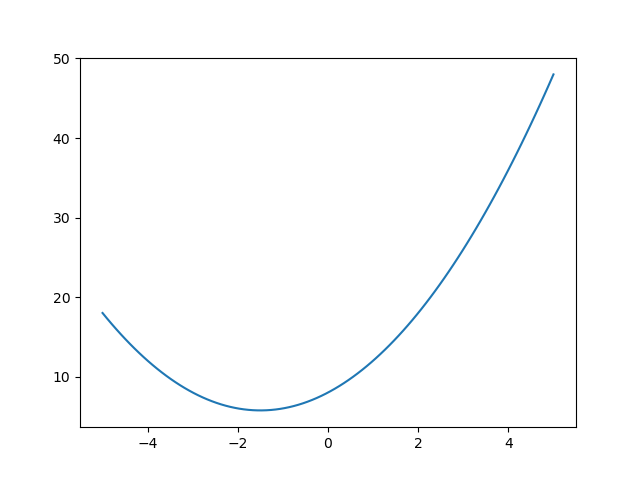

In [6]:
# Create the axis and function
xbase = np.linspace(-5, 5, 100)
ybase = testfunc(xbase)

fig, ax = plt.subplots()
ax.plot(xbase, ybase)
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro', markersize=4)
lngood, = ax.plot([], [], 'go', markersize=8)

xstart = 5
ystart = testfunc(xstart)

def plotbest(frame):
    global xstart, ystart
    lngood.set_data(xstart, ystart)
    xall.append(xstart)
    yall.append(ystart)
    lnall.set_data(xall, yall)
    x = graddescstep(testfunc, derivtestfunc, xstart, 0.05)
    xstart = x
    ystart = testfunc(xstart)

ani= FuncAnimation(fig, plotbest, frames=range(200), interval=100, repeat=False)
plt.show()

In [7]:
def testfunc(x):
    return cos(x)**4 - sin(x)**3 - 4*sin(x)**2 + cos(x) + 1

def derivtestfunc(x):
    return -4*sin(x)*(cos(x))**3 - 3*cos(x)*(sin(x)**2) - 8*sin(x)*cos(x) - sin(x)

In [8]:
graddesc(testfunc, derivtestfunc, 0.05, -0.1)

/var/folders/5r/rzr9y9p16tb0837c2m69sgkc0000gn/T/ipykernel_36505/635332150.py:16: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  lngood.set_data(xstart, ystart)


-1.7641724755162034

In [9]:
graddesc(testfunc, derivtestfunc, 0.05, 0.1)

1.661660812043789

Since this function is periodic, it has multiple critical points. Depending on our starting position, we will reach one of these points of local minima/maxima. For a range of [-pi,pi], depending on which side of 0 we start from, we will reach two different minimas. For more clarity, please refer to the animation.

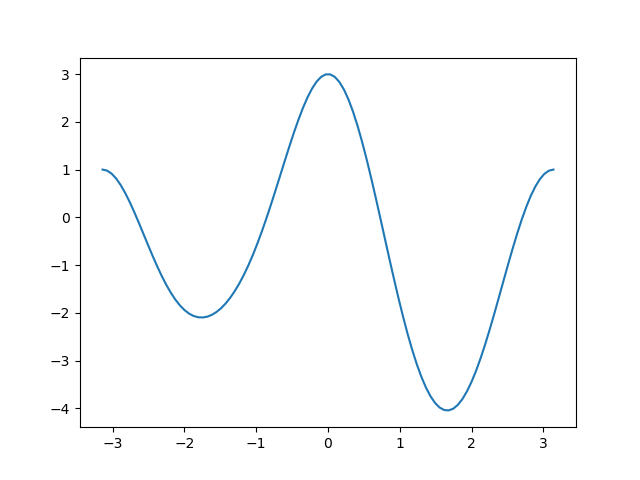

In [10]:
# Create the axis and function
xbase = np.linspace(-pi, pi, 100)
ybase = testfunc(xbase)

fig, ax = plt.subplots()
ax.plot(xbase, ybase)
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro', markersize=4)
lngood, = ax.plot([], [], 'go', markersize=8)

xstart = -0.1
ystart = testfunc(xstart)

def plotbest(frame):
    global xstart, ystart
    lngood.set_data(xstart, ystart)
    xall.append(xstart)
    yall.append(ystart)
    lnall.set_data(xall, yall)
    x = graddescstep(testfunc, derivtestfunc, xstart, 0.05)
    xstart = x
    ystart = testfunc(xstart)

ani= FuncAnimation(fig, plotbest, frames=range(200), interval=50, repeat=False)
plt.show()

## Multi Variable Gradient Descent

In [11]:
def multivargraddescstep(f, grad, start, lr):
    bestinputs = start
    direction = grad(bestinputs)
    tempinputs = bestinputs - direction * lr 
    bestinputs = tempinputs
    return bestinputs

/var/folders/5r/rzr9y9p16tb0837c2m69sgkc0000gn/T/ipykernel_36505/635332150.py:16: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  lngood.set_data(xstart, ystart)


Similar to the previous method, we have again implemented the gradient descent method, only this time we have extended it to functions having any desired number of parameters; it is a multi-dimensional gradient descent. We know that the gradient ∇f points in the direction of the greatest increase of f, that is, the direction of steepest ascent. Thus, by moving in the direction of the vector exactly opposite to this gradient, we can eventually work our way towards the minima of the function (__NOTE__: we have not accounted for saddle points, or global minima in this implementation).

The exact steps are as follows:

* Find the vector opposite to the direction of the gradient at the given point.
* Move along this vector (multiplied by the learning rate) and change the current position to the new point.
* Repeat until minima is reached.

In [13]:
def testfunc(inputs):
    # 3(x - 5)^2 + (y - 2.7)^2 + (z - 22)^2 + (w - 3)^2 + (l - 1)^2
    return 3*(inputs[0] - 5)**2 + (inputs[1]-2.7)**2 + (inputs[2] - 22)**2 + (inputs[3] - 3)**2 + (inputs[4] - 1)**2

def vecgradientfunc(inputs):
    # 6(x - 5), 2(y - 2.7), 2(z - 22), 2(w - 3), 2(l - 1) are coefficients of gradient vector
    return np.array([6*(inputs[0] - 5), 2*(inputs[1]-2.7), 2*(inputs[2] - 22), 2*(inputs[3] - 3), 2*(inputs[4] - 1)])

We will apply our gradient descent on a function with 5 variables and find the minimum. The vector coefficients of the gradient of the function are used to calculate the output gradient vector for a given set of inputs.

In [14]:
# initializing random starting values
start = [5, 3, 7, 4,12]

# multi variable gradient descent
def multivargraddesc(f, grad, start, lr):
    for i in range(50000):
        start = graddescstep(f, grad, start, lr)
    return start

Min = multivargraddesc(testfunc, vecgradientfunc, start, 0.001)
    
# printing final values
for i in range(len(Min)):
    print(f"Final Input {i} = {Min[i]}")
print(f"Value of function at obtained minima = {testfunc(Min)}")

Final Input 0 = 5.0
Final Input 1 = 2.700000000000111
Final Input 2 = 21.999999999999112
Final Input 3 = 3.000000000000111
Final Input 4 = 1.0000000000000555
Value of function at obtained minima = 8.16594296420188e-25


As we can see, we have pretty much reached the minima after 50000 iterations. Since are initial function was just a sum of squares of variables independent of one another, we can confirm that the obtained values are correct (equate each square term to 0 for minima).

Again, we will __NEVER__ actually reach the true minimum point using this method, but we can achieve high accuracy. Also, the value of the learning rate must also be set accordingly to prevent overshooting/oscillations while at the same time ensuring that the step size is not too low.

## 3D Animation of Gradient Descent

In [15]:
def testfunc(inputs):
    # x^2 + y^2
    return inputs[0]**2 + inputs[1]**2

def vecgradientfunc(inputs):
    # (2x)î + (2y)ĵ
    return np.array([2*inputs[0],2*inputs[1]])

For the 3D visualisation we shall use a simple function, z = x^2 + y^2 whose minima we know is at (0,0,0).

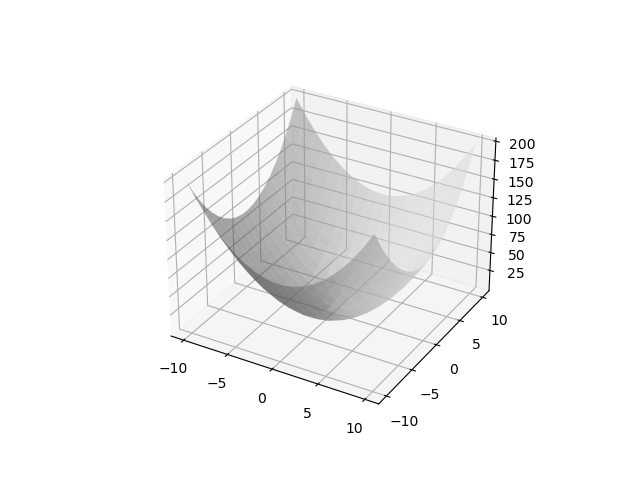

In [17]:
# Create the basic x and y arrays for choosing limits of plot
xbase = np.linspace(-10, 10, 20)
ybase = np.linspace(-10, 10, 20)

# Initialize matrices for surface plotting
xbase, ybase = np.meshgrid(xbase, ybase)
zbase = testfunc([xbase,ybase])
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plot the surface
ax.plot_surface(xbase, ybase, zbase, color='gainsboro',alpha = 0.5)

# Initialize matrices for points along the taken path
xall, yall, zall = [], [], []
lnall,  = ax.plot3D([], [], [], 'ro')
lngood, = ax.plot3D([], [], [], 'go', markersize=10)

# Initialize starting point
inputs = np.array([-10,0])
zstart = testfunc(inputs)

# Update path
def multidimplotbest(frame):
    global inputs, zstart
    xall.append(inputs[0])
    yall.append(inputs[1])
    zall.append(zstart)
    temp = multivargraddescstep(testfunc, vecgradientfunc, inputs, 0.05)
    inputs = temp
    zstart = testfunc(inputs)
    ax.plot(xall, yall, zall, color='red')
    

ani= FuncAnimation(fig, multidimplotbest, frames=range(150), interval=1, repeat=False)
plt.show()

The above code creates an animation for the path taken by the gradient descent function in 3D space. We have started at an arbitrary point and reached the minima of the function. Using a learning rate of 0.05, it has taken us just 200 iterations to reach the order of e-18 (found separately from the graph).

In [18]:
start = np.array([-10,0])
Min = multivargraddesc(testfunc, vecgradientfunc, start, 0.01)
# printing final values
for i in range(len(Min)):
    print(f"Final Input {i} = {Min[i]}")
print(f"Value of function at obtained minima = {testfunc(Min)}")

Final Input 0 = -1.2e-322
Final Input 1 = 0.0
Value of function at obtained minima = 0.0


## Problem Examples

In [19]:
def testfunc(inputs):
    # x^4 - 16*x^3 + 96*x^2 - 256*x + y^2 - 4*y + 262
    return inputs[0]**4 - 16*inputs[0]**3 + 96*inputs[0]**2 - 256*inputs[0] + inputs[1]**2 - 4*inputs[1] + 262

def vecgradientfunc(inputs):
    # gradient of above fxn
    return np.array([4*inputs[0]**3 - 48*inputs[0]**2 + 192*inputs[0] - 256,2*inputs[1] - 4])

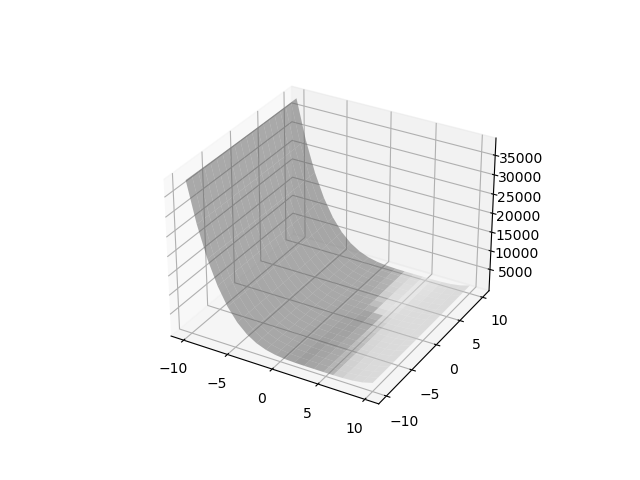

In [20]:
# Create the basic x and y arrays for choosing limits of plot
xbase = np.linspace(-10, 10, 20)
ybase = np.linspace(-10, 10, 20)

# Initialize matrices for surface plotting
xbase, ybase = np.meshgrid(xbase, ybase)
zbase = testfunc([xbase,ybase])
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plot the surface
ax.plot_surface(xbase, ybase, zbase, color='gainsboro',alpha = 0.5)

# Initialize matrices for points along the taken path
xall, yall, zall = [], [], []
lnall,  = ax.plot3D([], [], [], 'ro')
lngood, = ax.plot3D([], [], [], 'go', markersize=10)

# Initialize starting point
inputs = np.array([-10,0])
zstart = testfunc(inputs)

# Update path
def multidimplotbest(frame):
    global inputs, zstart
    xall.append(inputs[0])
    yall.append(inputs[1])
    zall.append(zstart)
    temp = multivargraddescstep(testfunc, vecgradientfunc, inputs, 1e-4)
    inputs = temp
    zstart = testfunc(inputs)
    ax.plot(xall, yall, zall, color='red')
    '''lngood.set_data(inputs[0],inputs[1], zstart)'''
    '''lnall.set_data(xall, yall,zall)'''

ani= FuncAnimation(fig, multidimplotbest, frames=range(500), interval=1, repeat=False)
plt.show()

In [21]:
start = np.array([-10,0])
Min = multivargraddesc(testfunc, vecgradientfunc, start, 1e-4)
# printing final values
for i in range(len(Min)):
    print(f"Final Input {i} = {Min[i]}")
print(f"Value of function at obtained minima = {testfunc(Min)}")

Final Input 0 = 3.8419069153662035
Final Input 1 = 1.9999092909070466
Value of function at obtained minima = 2.000624679441728


In [22]:
def testfunc(inputs):
    # e^(-(x-y)^2)* sin(y)
    return exp(-(inputs[0] - inputs[1])**2)*sin(inputs[1])

def vecgradientfunc(inputs):
    # gradient of above fxn
    return np.array([-2*exp(-(inputs[0] - inputs[1])**2)*sin(inputs[1])*(inputs[0] - inputs[1]),exp(-(inputs[0] - inputs[1])**2)*cos(inputs[1]) + 2*exp(-(inputs[0] - inputs[1])**2)*sin(inputs[1])*(inputs[0] - inputs[1])])

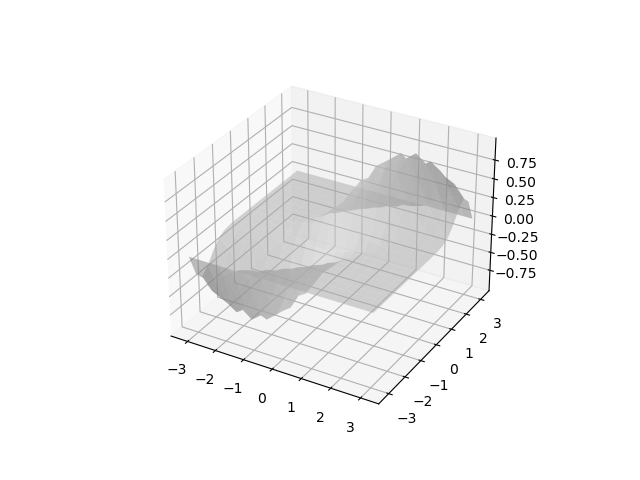

In [23]:
# Create the basic x and y arrays for choosing limits of plot
xbase = np.linspace(-pi, pi, 20)
ybase = np.linspace(-pi, pi, 20)

# Initialize matrices for surface plotting
xbase, ybase = np.meshgrid(xbase, ybase)
zbase = testfunc([xbase,ybase])
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plot the surface
ax.plot_surface(xbase, ybase, zbase, color='gainsboro',alpha = 0.5)

# Initialize matrices for points along the taken path
xall, yall, zall = [], [], []
lnall,  = ax.plot3D([], [], [], 'ro')
lngood, = ax.plot3D([], [], [], 'go', markersize=10)

# Initialize starting point
inputs = np.array([1,1])
zstart = testfunc(inputs)

# Update path
def multidimplotbest(frame):
    global inputs, zstart
    xall.append(inputs[0])
    yall.append(inputs[1])
    zall.append(zstart)
    temp = multivargraddescstep(testfunc, vecgradientfunc, inputs, 0.05)
    inputs = temp
    zstart = testfunc(inputs)
    ax.plot(xall, yall, zall, color='red')
    '''lngood.set_data(inputs[0],inputs[1], zstart)'''
    '''lnall.set_data(xall, yall,zall)'''

ani= FuncAnimation(fig, multidimplotbest, frames=range(500), interval=5, repeat=False)
plt.show()

In [24]:
start = np.array([1,1])
Min = multivargraddesc(testfunc, vecgradientfunc, start, 0.01)
# printing final values
for i in range(len(Min)):
    print(f"Final Input {i} = {Min[i]}")
print(f"Value of function at obtained minima = {testfunc(Min)}")

Final Input 0 = -1.570796326794869
Final Input 1 = -1.5707963267948746
Value of function at obtained minima = -1.0
